<a href="https://colab.research.google.com/github/farhanasajeer/github/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/heart.csv')

In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


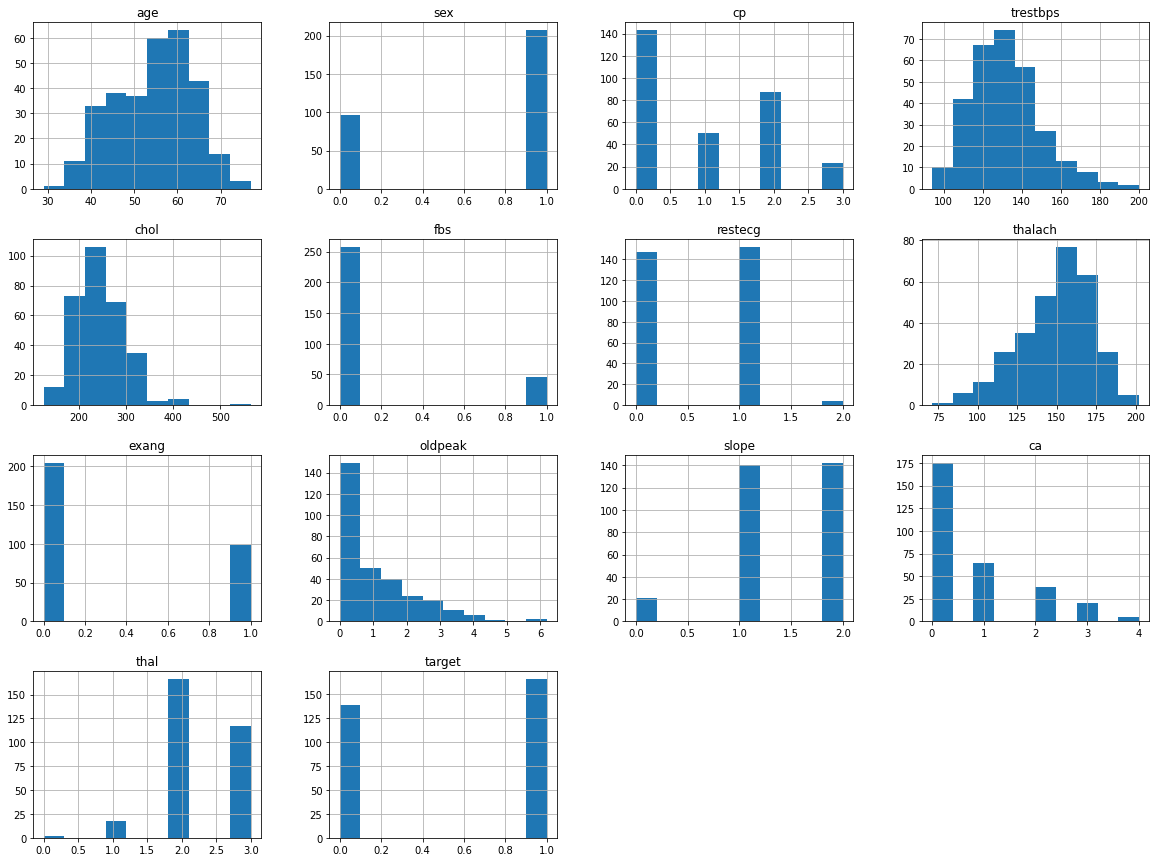

In [8]:
freqgraph = data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

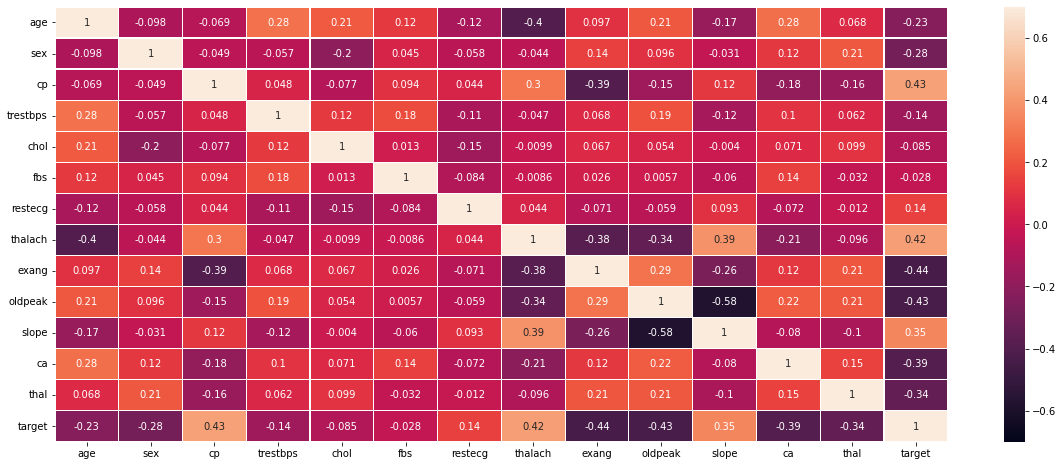

In [9]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-.7, vmax=0.7, annot=True,linewidths=0.2)

In [10]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
data1=data.drop(['sex','fbs'],axis=1)
data1.columns

Index(['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
y=data1['slope']
x=data1.drop(['slope'],axis=1)

In [13]:
x.shape

(303, 11)

In [14]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [15]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [16]:
print(y_test)

179    1
228    1
111    2
246    1
60     2
      ..
22     2
258    1
56     2
242    1
114    2
Name: slope, Length: 76, dtype: int64


In [17]:
print(predictions)

[1.27197591 1.56412523 1.77645074 1.33867771 1.62399323 1.29959491
 1.69719455 0.73098422 0.72046893 1.65386344 1.52651403 0.65551827
 1.78882246 0.82134281 1.73521834 1.80505238 1.68267131 1.13472096
 1.25957065 0.44264729 1.56832535 0.96572015 0.95755993 1.86868395
 1.72243642 1.75248975 1.43126593 1.80285729 1.58683616 1.72397519
 1.6063117  1.02182749 1.06540724 0.81254731 0.84794462 1.25385908
 1.08716991 1.98358381 1.41710676 1.83622463 2.13534786 1.67767766
 1.59054131 1.21703008 1.87201682 1.88745471 1.1032855  1.78739452
 0.87575951 1.45883399 1.73084619 1.89299548 1.62482746 1.81706882
 1.84375551 0.14452135 1.2395794  1.70487202 0.77939979 0.96872474
 0.85301519 1.82165044 1.21460542 0.58973785 1.35953368 1.33071716
 1.8643775  1.79561516 1.40347563 1.58179092 1.83155442 1.86161477
 1.12673036 1.80631196 1.02510929 1.73894896]


In [18]:
from sklearn.metrics import  mean_squared_error
print('MSE is:', mean_squared_error(y_test,predictions))

MSE is: 0.21727657427626165
